# Preparing Data

In [1]:
# IMPORT EVERYTHING
import matplotlib.pyplot as plt
from climatetb import *
import xarray as xr 

# example_path="D:/OneDrive/Data/dataset_d04_mini.nc"
# ds=xr.open_dataset(example_path)
# ds["T2"].isel(time=0)
# ds["T2"].sel(time='2022-04-03T18:00:00.000000000')
# ds

# Detect Preprocessing

In [2]:

example_path="D:/Dataset/NAM/wrfout_d01_2005-08-27_00_00_00"
ds=xr.open_dataset(example_path)

ds = standardize_coordinates(ds)

# Assert if ds has latitude, longitude, and time coordinates
assert 'latitude' in ds.dims, "Dataset is missing 'latitude' coordinate"
assert 'longitude' in ds.dims, "Dataset is missing 'longitude' coordinate"
assert 'time' in ds.dims, "Dataset is missing 'time' coordinate"

# Process wind components in the dataset
ds = process_wind(ds)
ds
if "U" in ds.data_vars and "V" in ds.data_vars:
    if len(ds.U.dims) <=3:
        assert "WS" in ds.data_vars, "Wind speed is missing"
if "U10" in ds.data_vars and "V10" in ds.data_vars:
    assert "WS10" in ds.data_vars, "Wind speed 10m is missing"



Calculated WS10 from U10 and V10


# Detect Visualization

## Test function

<xarray.Dataset> Size: 66MB
Dimensions:                (latitude: 129, longitude: 169, bottom_top: 31,
                            bottom_top_stag: 32, soil_layers_stag: 4,
                            west_east_stag: 170, south_north_stag: 130)
Coordinates:
    XLAT_U                 (latitude, west_east_stag) float32 88kB ...
    XLONG_U                (latitude, west_east_stag) float32 88kB ...
    XLAT_V                 (south_north_stag, longitude) float32 88kB ...
    XLONG_V                (south_north_stag, longitude) float32 88kB ...
    time                   datetime64[ns] 8B 2005-08-27
  * longitude              (longitude) float32 676B -99.47 -99.34 ... -78.53
  * latitude               (latitude) float32 516B 17.57 17.69 ... 31.9 32.0
Dimensions without coordinates: bottom_top, bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag
Data variables: (12/190)
    Times                  |S19 19B ...
    LU_INDEX               (latitude, longitude) float32 87kB ...
    ZNU                    (bottom_top) float32 124B ...
    ZNW                    (bottom_top_stag) float32 128B ...
    ZS                     (soil_layers_stag) float32 16B ...
    DZS                    (soil_layers_stag) float32 16B ...
    ...                     ...
    PC                     (latitude, longitude) float32 87kB ...
    LANDMASK               (latitude, longitude) float32 87kB ...
    LAKEMASK               (latitude, longitude) float32 87kB ...
    SST                    (latitude, longitude) float32 87kB ...
    SST_INPUT              (latitude, longitude) float32 87kB ...
    WS10                   (latitude, longitude) float32 87kB 4.116 ... 6.223
Attributes: (12/120)
    TITLE:                            OUTPUT FROM WRF V3.9.1.1 MODEL
    START_DATE:                      2005-08-27_00:00:00
    SIMULATION_START_DATE:           2005-08-27_00:00:00
    WEST-EAST_GRID_DIMENSION:        170
    SOUTH-NORTH_GRID_DIMENSION:      130
    BOTTOM-TOP_GRID_DIMENSION:       32
    ...                              ...
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      -1
    ETAC:                            0.0
    time:                            {'FieldType': 104, 'MemoryOrder': '0  ',...

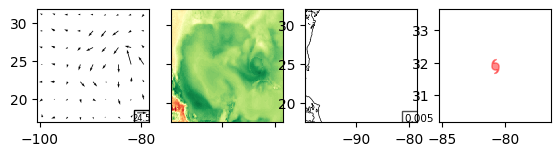

In [3]:
ds_frame=ds.isel(time=0)
fig = plt.figure(figsize=(1.7 * 10, 1.7 * 5))  # Adjusted for 50 subplots (10x5)
ax = fig.add_subplot(5, 10, 1)  # First subplot in the first column, first row 
draw_wind_quiver(ax, ds_frame.U10, ds_frame.V10,density=20)
 

ax = fig.add_subplot(5, 10, 2)  # First subplot in the first column, first row
plot_single_ds(ax,ds_frame["QVAPOR"].isel(bottom_top=1))

ax = fig.add_subplot(5, 10, 3)  # First subplot in the first column, first row
draw_contour(ax,ds_frame["QVAPOR"].isel(bottom_top=1),color_range=[0.01,0.02],interval=0.005)

ax = fig.add_subplot(5, 10, 4)  # First subplot in the first column, first row
plot_maxima(ax,ds_frame["PSFC"],color="red",pt_size=25,  circle=False, alpha=0.45)

ds_frame


## Test final visualization

ax=plt.figure(figsize=(10,10)).add_subplot(111)

ax=plot_map(clean_data,date,feature_names,ax=ax)    

ax.show()



7it [00:01,  4.14it/s]


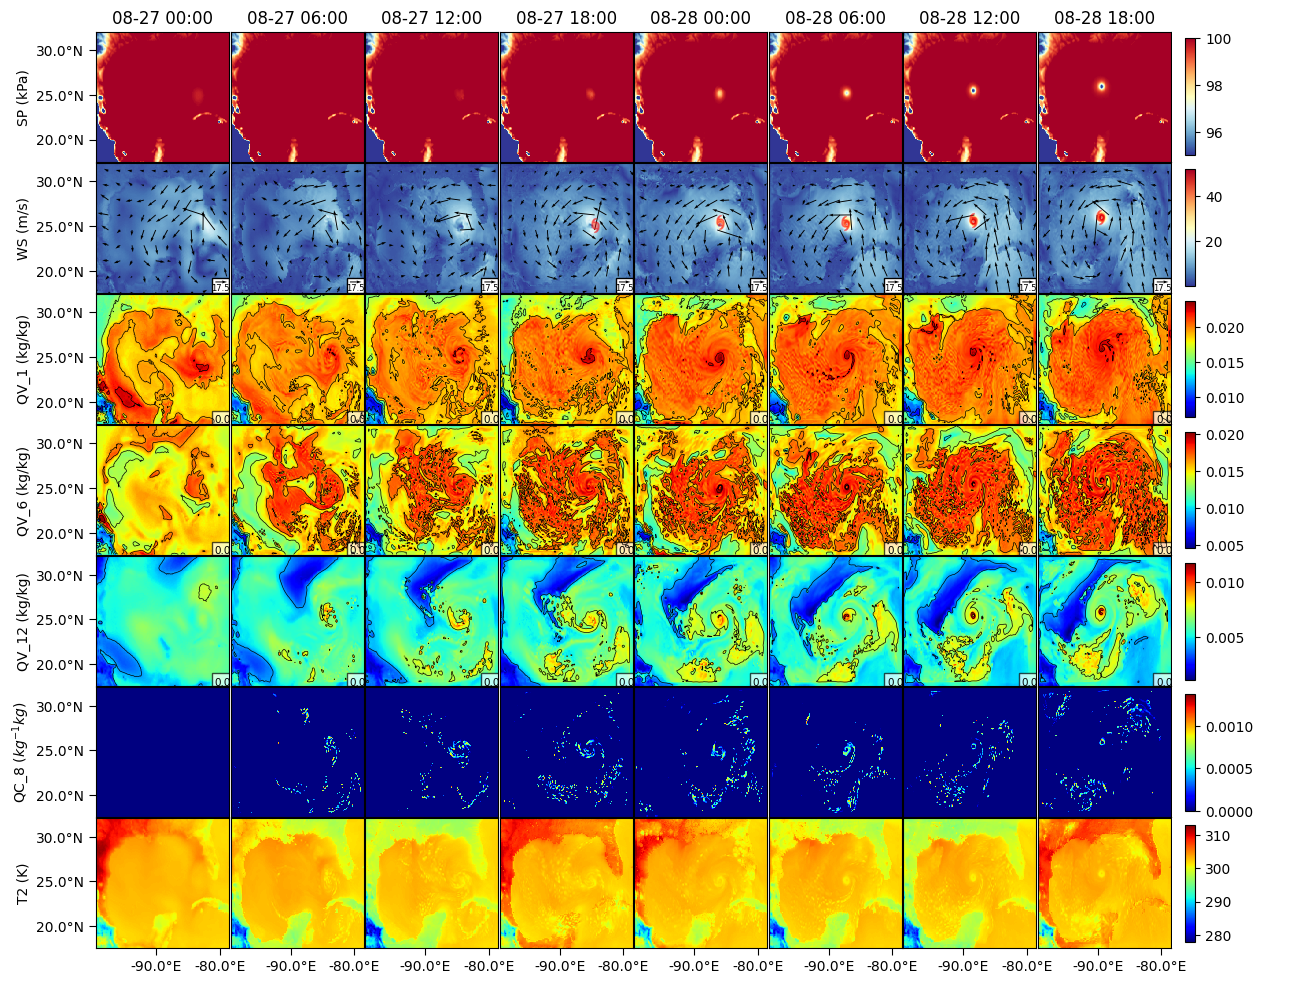

<xarray.Dataset> Size: 3GB
Dimensions:                (time: 43, latitude: 129, longitude: 169,
                            bottom_top: 31, bottom_top_stag: 32,
                            soil_layers_stag: 4, west_east_stag: 170,
                            south_north_stag: 130)
Coordinates:
    XLAT_U                 (time, latitude, west_east_stag) float32 4MB ...
    XLONG_U                (time, latitude, west_east_stag) float32 4MB ...
    XLAT_V                 (time, south_north_stag, longitude) float32 4MB ...
    XLONG_V                (time, south_north_stag, longitude) float32 4MB ...
  * time                   (time) datetime64[ns] 344B 2005-08-27 ... 2005-08-...
  * longitude              (longitude) float32 676B -99.47 -99.34 ... -78.53
  * latitude               (latitude) float32 516B 17.57 17.69 ... 31.9 32.0
Dimensions without coordinates: bottom_top, bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag
Data variables: (12/190)
    Times                  (time) |S19 817B ...
    LU_INDEX               (time, latitude, longitude) float32 4MB ...
    ZNU                    (time, bottom_top) float32 5kB ...
    ZNW                    (time, bottom_top_stag) float32 6kB ...
    ZS                     (time, soil_layers_stag) float32 688B ...
    DZS                    (time, soil_layers_stag) float32 688B ...
    ...                     ...
    PC                     (time, latitude, longitude) float32 4MB ...
    LANDMASK               (time, latitude, longitude) float32 4MB ...
    LAKEMASK               (time, latitude, longitude) float32 4MB ...
    SST                    (time, latitude, longitude) float32 4MB ...
    SST_INPUT              (time, latitude, longitude) float32 4MB ...
    WS10                   (time, latitude, longitude) float32 4MB 4.116 ... ...
Attributes: (12/120)
    TITLE:                            OUTPUT FROM WRF V3.9.1.1 MODEL
    START_DATE:                      2005-08-27_00:00:00
    SIMULATION_START_DATE:           2005-08-27_00:00:00
    WEST-EAST_GRID_DIMENSION:        170
    SOUTH-NORTH_GRID_DIMENSION:      130
    BOTTOM-TOP_GRID_DIMENSION:       32
    ...                              ...
    ISICE:                           15
    ISURBAN:                         13
    ISOILWATER:                      14
    HYBRID_OPT:                      -1
    ETAC:                            0.0
    time:                            {'FieldType': 104, 'MemoryOrder': '0  ',...

In [4]:
 
yr=2005 
date=[f'{yr}-08-27 00:00:00',f'{yr}-08-27 06:00:00',f'{yr}-08-27 12:00:00', f'{yr}-08-27 18:00:00',
      f'{yr}-08-28 00:00:00',f'{yr}-08-28 06:00:00',f'{yr}-08-28 12:00:00', f'{yr}-08-28 18:00:00'] 
fea_dict = {
   'PSFC': {'str': 'SP', 'unit': 'kPa','convert':{'multiplier':1/1000},'range':[95,100],
             'func':[plot_single_ds], 'func_args':[{}]},
    'WS10': {'str': 'WS', 'unit': 'm/s','func':[plot_single_ds,draw_wind_quiver,plot_maxima], 
             'func_args':[None,{"density":15,"scale":100},{"color":"red","pt_size":25,"circle":False,"alpha":0.45,"threshold":23, "min":False}],'vector':["U10","V10"]},
    'QVAPOR_1': {'str': 'QV_1', 'unit': 'kg/kg', 'index':{'bottom_top':1}, 
               'func':[plot_single_ds,draw_contour], 'func_args':[{},{"interval":0.003}]},
    'QVAPOR_6': {'str': 'QV_6', 'unit': 'kg/kg', 'index':{'bottom_top':6}, 
               'func':[plot_single_ds,draw_contour], 'func_args':[{},{"interval":0.003}]},
    'QVAPOR_12': {'str': 'QV_12', 'unit': 'kg/kg', 'index':{'bottom_top':12}, 
               'func':[plot_single_ds,draw_contour], 'func_args':[{},{"interval":0.003}]},
    'QCLOUD_8': {'str': 'QC_8', 'unit': '$kg^{-1}kg$','func':[plot_single_ds], 'func_args':[None], "index":{"bottom_top":8}}, 
    'T2': {'str': 'T2', 'unit': 'K','func':[plot_single_ds], 'func_args':[None]},
}
visualize_dataset(ds, date, fea_dict)
ds